# Predator Analysis: ESCA

## Evaluation on _CancerMine_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_ESCA_CancerMine.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display

In [2]:
# Paths
## SNVs
SNV_COMMON_PATH = "C:/Users/ibrah/Desktop/SNV_data/SNV_datasets/"
SNV_ESCA_PATH = SNV_COMMON_PATH + "SNV_ESCA_hg38_2021-09-22.csv"

PREDICTION_ID = "59544312/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/esca_prediction_2021-11-17/" + PREDICTION_ID
PREDICTION_ESCA_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2021-11-17.csv"

ELASPIC_RESULTS_COMMON_PATH = "../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/"  
ESCA_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "ESCA_Core_2021-11-17.txt"
ESCA_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "ESCA_Interface_2021-11-17.txt"

# Patient Interaction data
ESCA_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/ESCA_patient_interactions_analysis_table_2021-11-17.xlsx"

# CANCER MINE GENES
CANCER_MINE_ALL_PATH = "../data/cancer_mine_genes/all_genes_2021-10-26.txt"
CANCER_MINE_ESOPHAGEAL_PATH = "../data/cancer_mine_genes/esophageal_genes_2021-10-26.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [3]:
from PredatorAnalysis import PredatorAnalysis

In [4]:
predator_analysis = PredatorAnalysis(
    tcga="esca",
    snv_path=SNV_ESCA_PATH,
    prediction_data_path=PREDICTION_ESCA_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=ESCA_CORE_PATH,
    elaspic_interface_path=ESCA_INTERFACE_PATH,
    patient_interaction_data_path=ESCA_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cancermine",
    reference_data_spec_cohort_path=CANCER_MINE_ESOPHAGEAL_PATH,
    reference_data_path=CANCER_MINE_ALL_PATH
)

2021-11-17 20:05:40 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2021-11-17 20:05:40 | INFO     | PredatorAnalysis | TCGA: esca
2021-11-17 20:05:40 | INFO     | PredatorAnalysis | PREDICTION ID: 59544312/
2021-11-17 20:05:40 | INFO     | helpers.helpers_analysis.loaders | Loading esca SNV datasets ..
2021-11-17 20:05:42 | DEBUG    | helpers.helpers_analysis.loaders | esca SNV data size: (45313, 121)
2021-11-17 20:05:42 | DEBUG    | helpers.helpers_analysis.loaders | esca SNV data processed size: (19497, 121)
2021-11-17 20:05:42 | INFO     | helpers.helpers_analysis.loaders | esca SNV datasets are loaded.
2021-11-17 20:05:42 | INFO     | helpers.helpers_analysis.loaders | Loading esca Prediction dataset ..
2021-11-17 20:05:42 | DEBUG    | helpers.helpers_analysis.loaders | esca Prediction data shape: (1194, 5)
2021-11-17 20:05:42 | INFO     | helpers.helpers_analysis.loaders | esca Prediction dataset is loaded.
2021-11-17 20:05:42 | INFO     | helpers.helpers_analysis.loa

# Datasets

##  1. SNV Datasets

In [5]:
# Original SNV Dataset
print(predator_analysis.data_materials["esca_snv_data"].shape)

(45313, 121)


In [6]:
# Processed SNV Dataset
print(predator_analysis.data_materials["esca_snv_data_processed"].shape)

(19497, 121)


In [7]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["esca_snv_data_simplified"].shape)
predator_analysis.data_materials["esca_snv_data_simplified"].head(3)

(19497, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0        MFN2    O95140       L327V         TCGA-KH-A6WC
1       KCNG3    Q8TAE7       I223L         TCGA-KH-A6WC
2        MAP2    P11137       V198I         TCGA-KH-A6WC

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [8]:
# Core data 
print(predator_analysis.data_materials["esca_elaspic_core_data"].shape)
predator_analysis.data_materials["esca_elaspic_core_data"].head(3)

(6210, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           P00488     P00488    T573M   done  core   COSM3411230   
1           Q8TAE7     Q8TAE7    I223L   done  core             -   
2           Q9ULI3     Q9ULI3    C989S   done  core             -   

  ClinVar_mut_ID UniProt_mut_ID      Domain_name        Domain_clan  ...  \
0              -              -      Transglut_C        Transglut_C  ...   
1              -              -  BTB_2+Ion_trans  BTB_2+Ion_channel  ...   
2              -              -              EGF                EGF  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  113.0                      -                        -   
1                  427.0                      -                        -   
2                   43.0                      -                        -   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                       -                          -   
1                       -                       -                          -   
2                       -                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [9]:
# Core data simplified
print(predator_analysis.data_materials["esca_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["esca_elaspic_core_data_simplified"].head(3)

(6208, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P00488    T573M                     -
1     Q8TAE7    I223L                     -
2     Q9ULI3    C989S                     -

### 2.2 `Interface` Datasets

In [10]:
print(predator_analysis.data_materials["esca_elaspic_interface_data"].shape)
predator_analysis.data_materials["esca_elaspic_interface_data"].head(3)  ## <-- i was here

(2425, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           P61088     P61088     E61K   done  interface             -   
1           P61088     P61088     E61K   done  interface             -   
2           P61088     P61088     E61K   done  interface             -   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -      UQ_con      UQ_con  ...   
1              -              -      UQ_con      UQ_con  ...   
2              -              -      UQ_con      UQ_con  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  254.0                33.4527                  33.4511   
1                  254.0                33.4527                  33.4511   
2                  254.0                33.4527                  33.4511   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 40.0177                 40.0114                    319.225   
1                 40.0177                 40.0114                    319.225   
2                 40.0177                 40.0114                    319.225   

  Interface_hydrophilic_area Interface_total_area  \
0                     201.86              521.085   
1                     201.86              521.085   
2                     201.86              521.085   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                         2.612                         4.42118  
1                         2.612                         4.42118  
2                         2.612                         4.42118  

[3 rows x 103 columns]

In [11]:
print(predator_analysis.data_materials["esca_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["esca_elaspic_interface_processed_data"].head(3)

(1239, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P61088     E61K                P38398
1     P61088     E61K                O95628
2     P61088     E61K                Q96PU5

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *esca_elaspic_core_data_simplified*
+ *esca_interface_processed*

In [12]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["esca_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["esca_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["esca_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["esca_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P00488    T573M                     -
1     Q8TAE7    I223L                     -
2     Q9ULI3    C989S                     -

Data dimensions: (6208, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P61088     E61K                P38398
1     P61088     E61K                O95628
2     P61088     E61K                Q96PU5

Data dimensions: (1239, 3)


In [13]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["esca_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["esca_elaspic_core_and_interface_data"].head(3)

(7447, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P00488    T573M                     -
1     Q8TAE7    I223L                     -
2     Q9ULI3    C989S                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [14]:
print(predator_analysis.data_materials["esca_prediction_data"].shape)
predator_analysis.data_materials["esca_prediction_data"].head(3)

(1194, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     P61088     E61K                P38398           1             0.57282
1     P61088     E61K                Q96PU5           1             0.68296
2     P61088     E61K                Q9Y4L5           1             0.62781

## 4. CancerMine Genes

In [15]:
print(len(predator_analysis.data_materials['cancermine_esca_genes']))
predator_analysis.data_materials['cancermine_esca_genes'][:5]

7


['TP53', 'CDH1', 'RUNX2', 'KLF4', 'APC']

In [16]:
print(len(predator_analysis.data_materials['cancermine_all_genes']))
predator_analysis.data_materials['cancermine_all_genes'][:5]

1024


['ERBB2', 'ABL1', 'EGFR', 'KRAS', 'BRAF']

# Prepare Analysis

In [17]:
predator_analysis.prepare_analysis()

2021-11-17 20:06:07 | DEBUG    | PredatorAnalysis | esca_elaspic_proteins loaded.
2021-11-17 20:06:07 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC esca: 4257


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/4257 [00:00<?, ?it/s]

2021-11-17 20:06:07 | DEBUG    | PredatorAnalysis | esca_protein_to_gene_dict loaded.


  0%|          | 0/4257 [00:00<?, ?it/s]

0 	 A0AVI2 	 0
1 	 A0AVT1 	 0
2 	 A0PJE2 	 0
3 	 A0PJK1 	 0
4 	 A1KZ92 	 0
2021-11-17 20:06:10 | DEBUG    | PredatorAnalysis | esca_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/4257 [00:00<?, ?it/s]

0 	 A0AVI2 	 0
1 	 A0AVT1 	 0
2 	 A0PJE2 	 0
3 	 A0PJK1 	 0
4 	 A1KZ92 	 0
2021-11-17 20:06:12 | DEBUG    | PredatorAnalysis | esca_protein_to_num_unique_interactors loaded.
2021-11-17 20:06:12 | DEBUG    | PredatorAnalysis | Number of patients in esca: 184.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [18]:
print('Number of proteins in ELASPIC ESCA:', len(predator_analysis.data_materials["esca_elaspic_proteins"]))

Number of proteins in ELASPIC ESCA: 4257


## 2. Genes

In [19]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["esca_protein_to_gene_dict"].items())[:5]

[('A0AVI2', 'FER1L5'),
 ('A0AVT1', 'UBA6'),
 ('A0PJE2', 'DHRS12'),
 ('A0PJK1', 'SLC5A10'),
 ('A1KZ92', 'PXDNL')]

## 3. ELASPIC Number of Interface Entries

In [20]:
list(predator_analysis.data_materials["esca_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AVI2', 0), ('A0AVT1', 0), ('A0PJE2', 0), ('A0PJK1', 0), ('A1KZ92', 0)]

In [21]:
# TP53
predator_analysis.data_materials["esca_protein_to_num_elaspic_interface_entries"]["P04637"]  # 98

98

## 4. ELASPIC Number of Unique Interactors

In [22]:
list(predator_analysis.data_materials["esca_protein_to_num_unique_interactors"].items())[:5]

[('A0AVI2', 0), ('A0AVT1', 0), ('A0PJE2', 0), ('A0PJK1', 0), ('A1KZ92', 0)]

In [23]:
# TP53
predator_analysis.data_materials["esca_protein_to_num_unique_interactors"]["P04637"]  # 17

17

## 5. Patients

In [24]:
print(f'Number of patients {len(predator_analysis.data_materials["esca_patients"])}.')  # 184.

Number of patients 184.


# Analysis Table Construction

In [25]:
predator_analysis.construct_analysis_table()

2021-11-17 20:24:22 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2021-11-17 20:24:22 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2021-11-17 20:24:22 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2021-11-17 20:24:22 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2021-11-17 20:24:25 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2021-11-17 20:24:28 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2021-11-17 20:24:28 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/184 [00:00<?, ?it/s]

2021-11-17 20:25:44 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/184 [00:00<?, ?it/s]

2021-11-17 20:27:14 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2021-11-17 20:27:25 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/184 [00:00<?, ?it/s]

2021-11-17 20:29:10 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2021-11-17 20:29:10 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/184 [00:00<?, ?it/s]

2021-11-17 20:30:18 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2021-11-17 20:30:19 | DEBUG    | PredatorAnalysis | esca_preliminary_data is constructed.


In [26]:
predator_analysis.data_materials["esca_preliminary_data"]

PROTEIN     GENE  NUM_ELASPIC_INTERFACE_ENTRIES  NUM_DISRUPTIVE_ENTRIES  \
0     A0AVI2   FER1L5                              0                       0   
1     A0AVT1     UBA6                              0                       0   
2     A0PJE2   DHRS12                              0                       0   
3     A0PJK1  SLC5A10                              0                       0   
4     A1KZ92    PXDNL                              0                       0   
...      ...      ...                            ...                     ...   
4252  Q9Y6U7   RNF215                              0                       0   
4253  Q9Y6W3    CAPN7                              0                       0   
4254  Q9Y6W6   DUSP10                              0                       0   
4255  Q9Y6X5    ENPP4                              0                       0   
4256  Q9Y6X6    MYO16                              6                       1   

      NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  PATIENT_CORE_COUNT  \
0                          0                       0                   3   
1                          0                       0                   2   
2                          0                       0                   1   
3                          0                       0                   2   
4                          0                       0                   8   
...                      ...                     ...                 ...   
4252                       0                       0                   1   
4253                       0                       0                   1   
4254                       0                       0                   1   
4255                       0                       0                   2   
4256                       5                       2                   3   

      PATIENT_INTERFACE_COUNT  NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  \
0                           0                                             0   
1                           0                                             0   
2                           0                                             0   
3                           0                                             0   
4                           0                                             0   
...                       ...                                           ...   
4252                        0                                             0   
4253                        0                                             0   
4254                        0                                             0   
4255                        0                                             0   
4256                        3                                             1   

      BASELINE  OUR_METHOD  OUR_METHOD/BASELINE  ELASPIC_COVERAGE  \
0            0           0                  NaN                 3   
1            0           0                  NaN                 2   
2            0           0                  NaN                 1   
3            0           0                  NaN                 2   
4            0           0                  NaN                 8   
...        ...         ...                  ...               ...   
4252         0           0                  NaN                 1   
4253         0           0                  NaN                 1   
4254         0           0                  NaN                 1   
4255         0           0                  NaN                 2   
4256         6           1             0.166667                 6   

     CancerMine_STATUS CancerMine_STATUS (ESCA)  
0                    -                        -  
1                    -                        -  
2                    -                        -  
3                    -                        -  
4                    -                        -  
...                ...                      ...  
425

# ROC Curve Analysis

2021-11-17 20:30:19 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


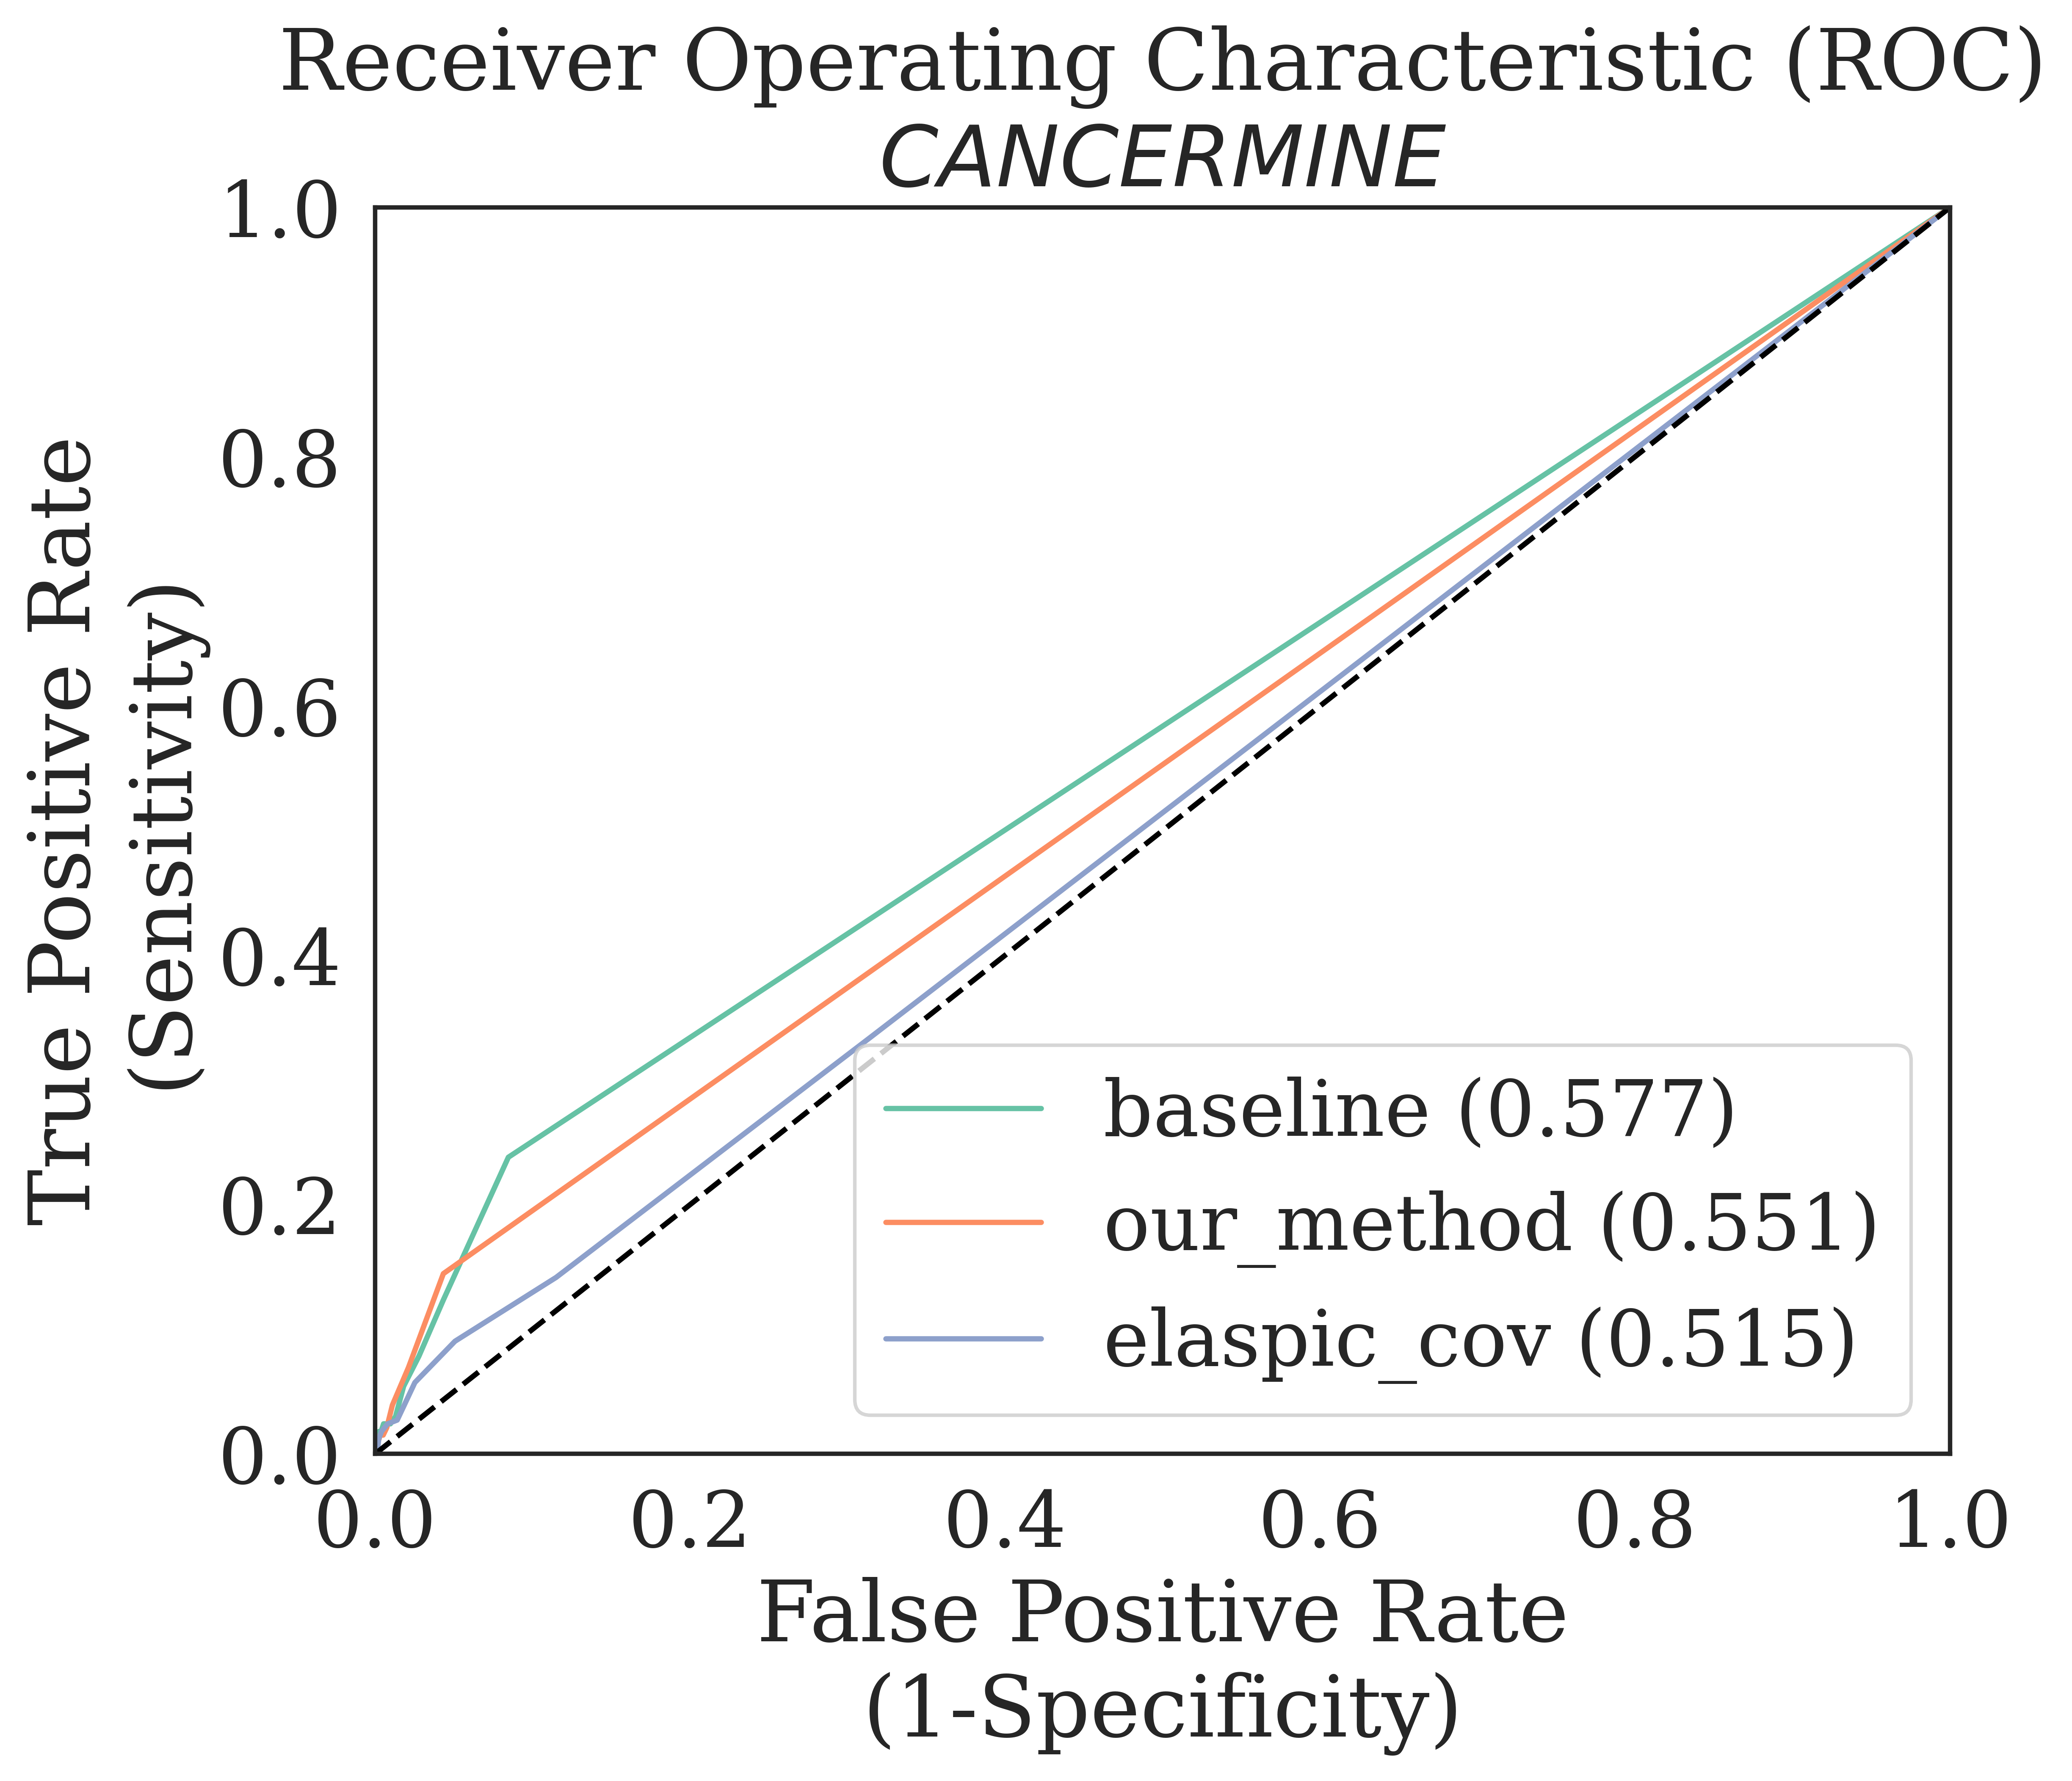

2021-11-17 20:30:23 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.577
2021-11-17 20:30:23 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.551
2021-11-17 20:30:23 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.515


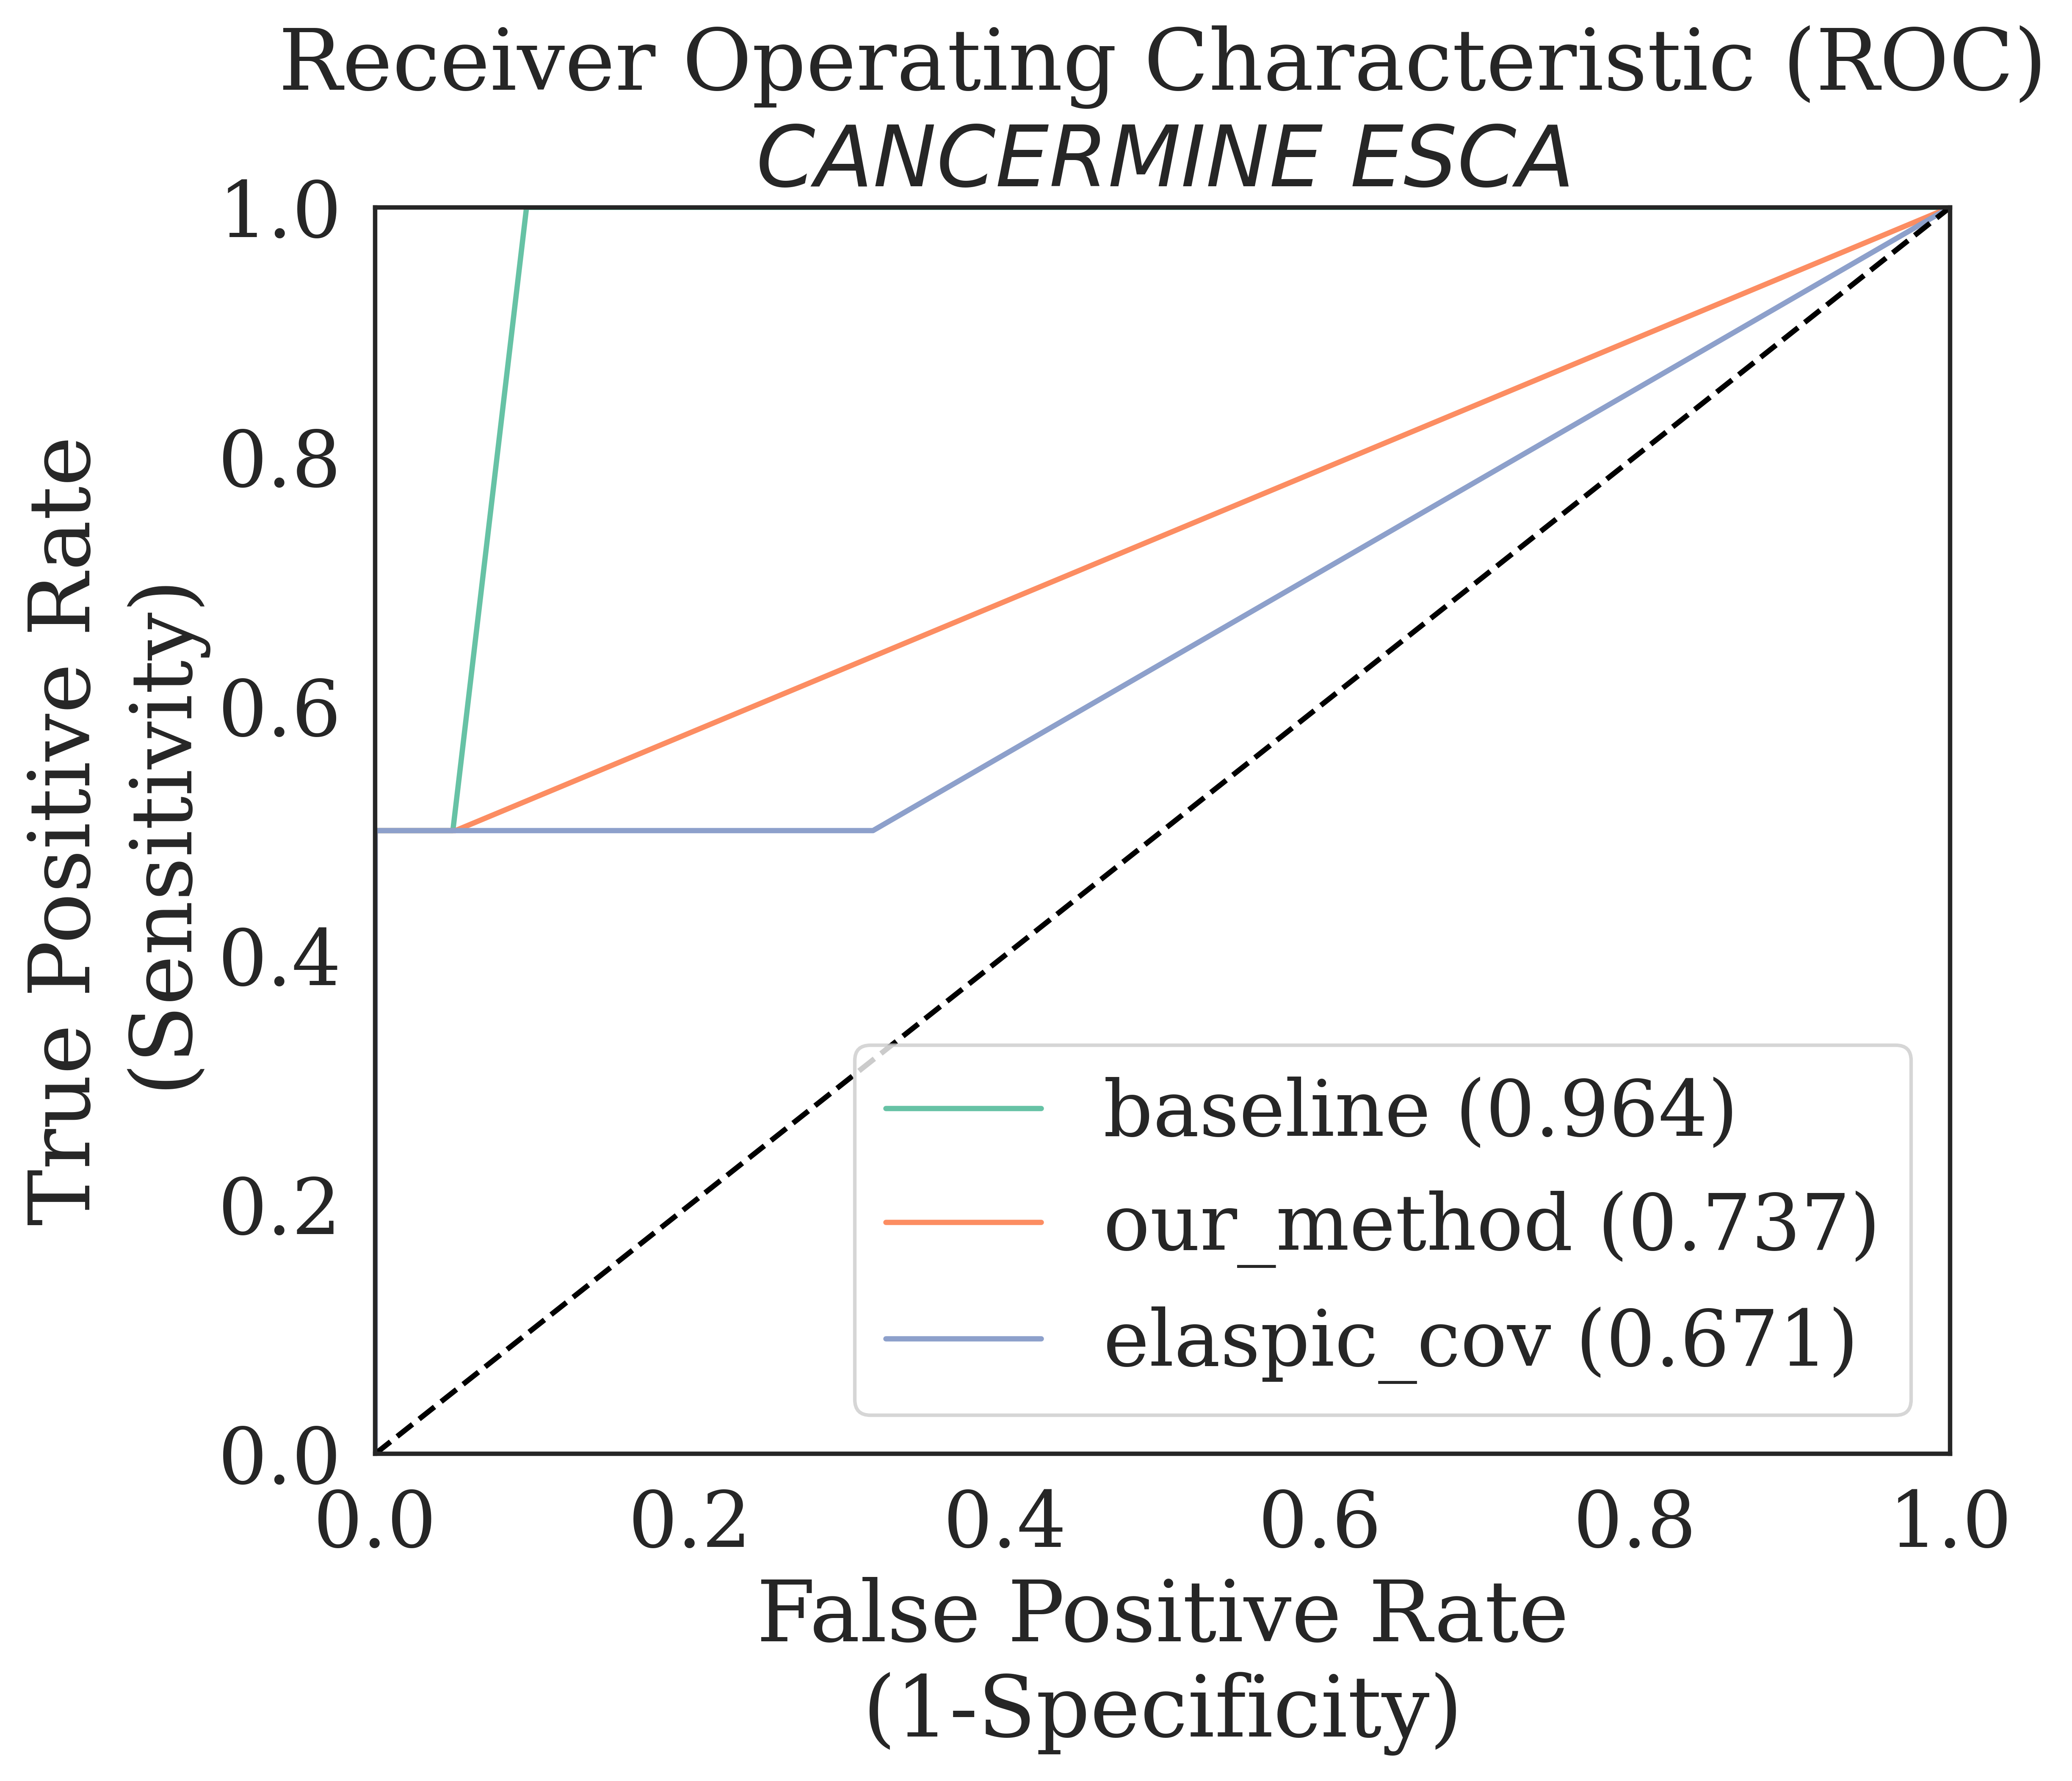

2021-11-17 20:30:25 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.964
2021-11-17 20:30:25 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.737
2021-11-17 20:30:25 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.671


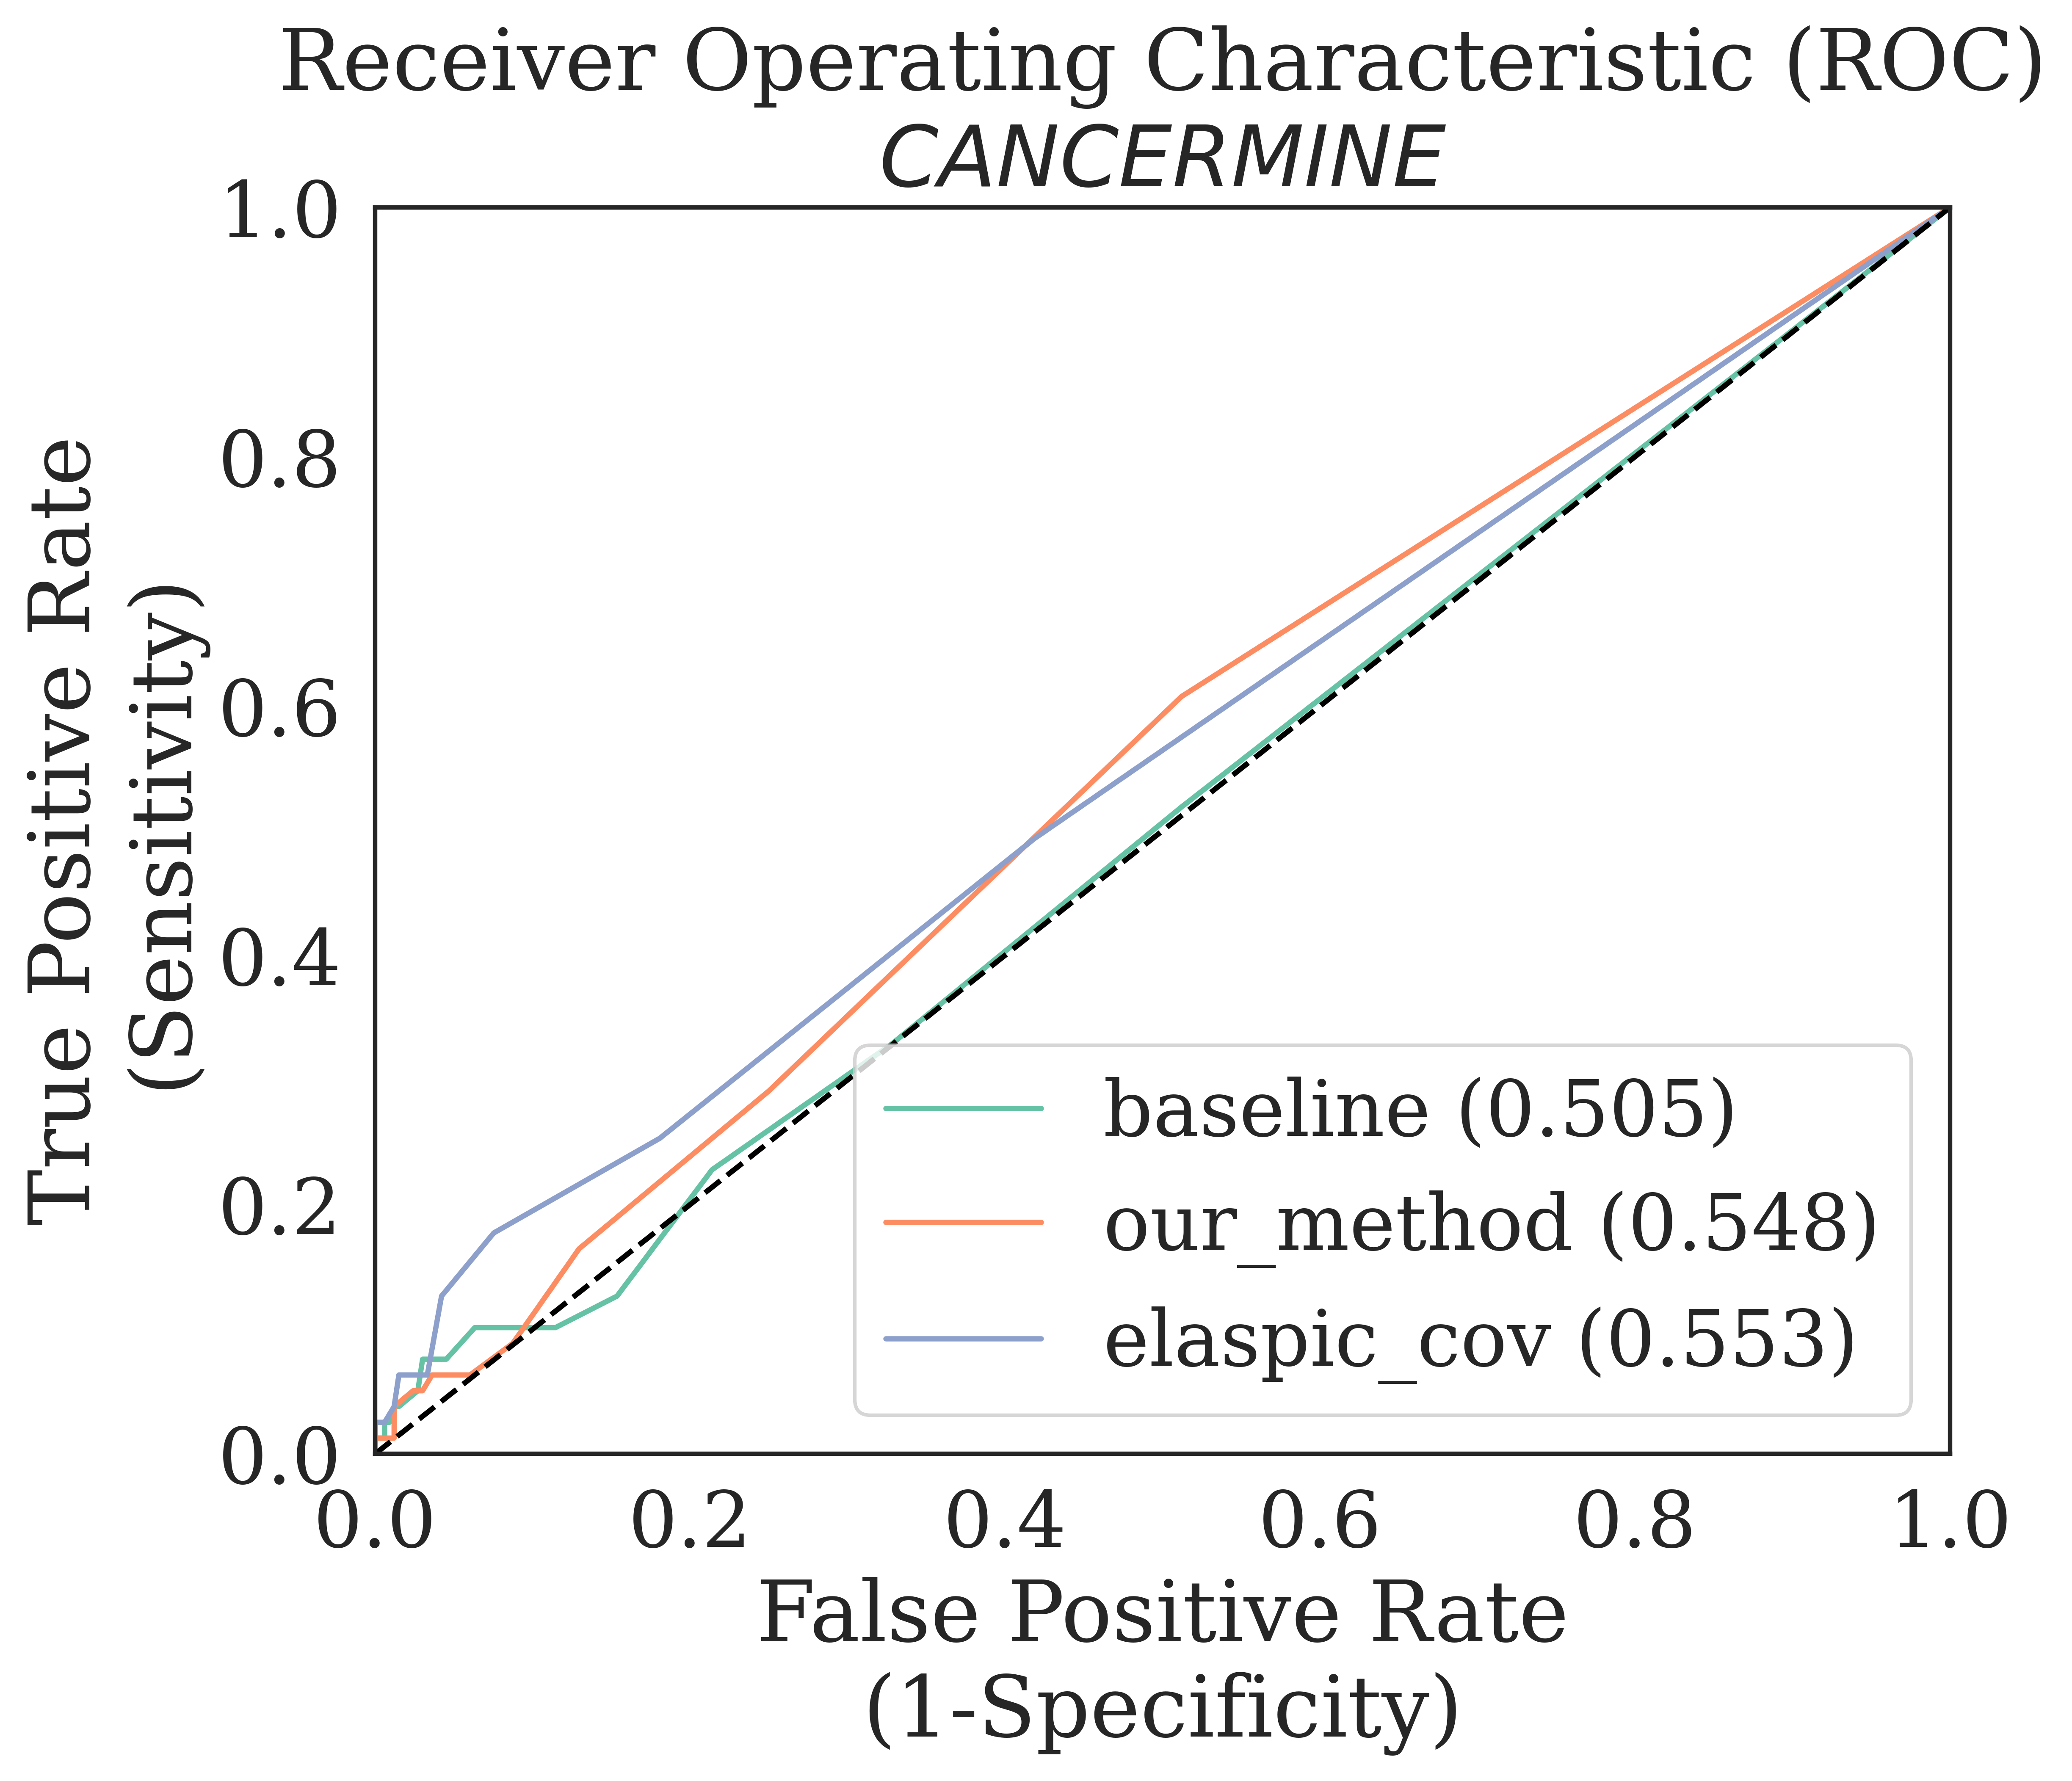

2021-11-17 20:30:28 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.505
2021-11-17 20:30:28 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.548
2021-11-17 20:30:28 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.553


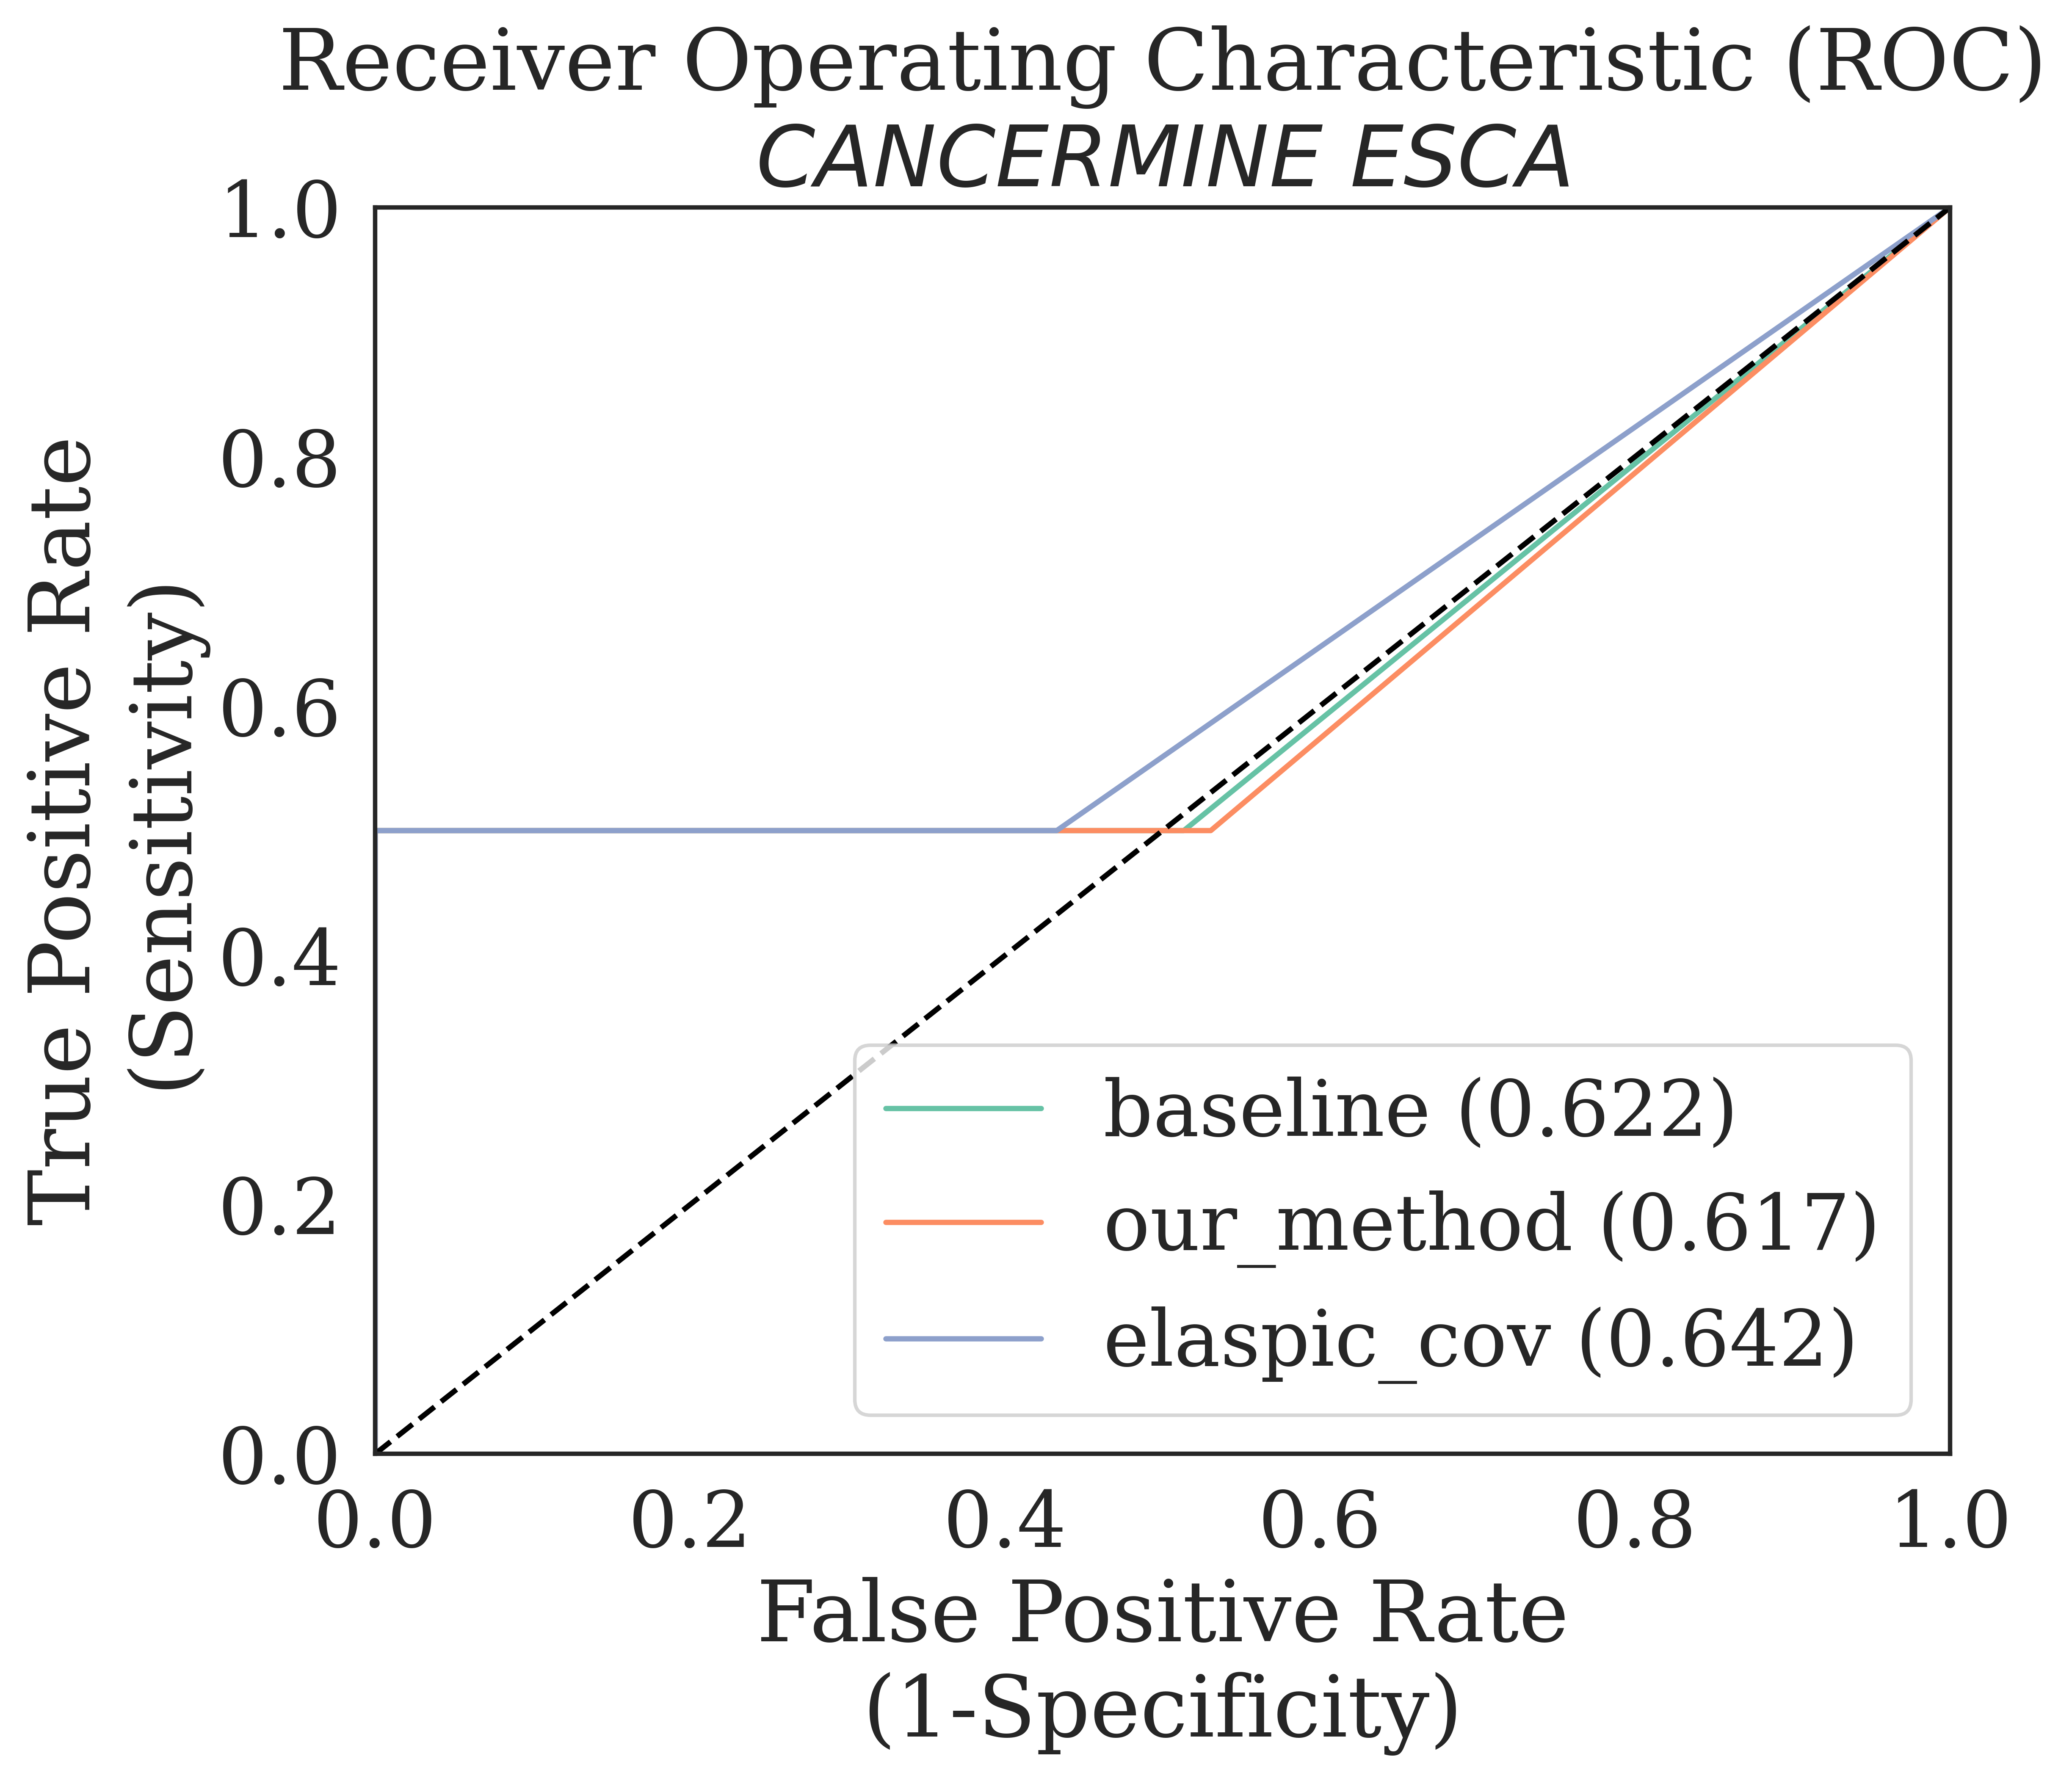

2021-11-17 20:30:33 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.622
2021-11-17 20:30:33 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.617
2021-11-17 20:30:33 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.642


In [27]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="esca_preliminary_data",
    state_variables=["CancerMine_STATUS", "CancerMine_STATUS (ESCA)"]
)

In [28]:
predator_analysis.export_auc_scores("auc_scores_cancermine", overwrite=True)

default default_esca baseline_nonzero baseline_nonzero_esca
Method                                                                 
BASELINE      0.577        0.964            0.505                 0.622
OURS          0.551        0.737            0.548                 0.617
ELASPIC_COV   0.515        0.671            0.553                 0.642

2021-11-17 20:30:33 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\esca_prediction_2021-11-17\59544312\auc_scores_cancermine_2021-11-17.csv


# Save to Excel file

In [29]:
from helpers.helpers_analysis.common import save_to_excel

In [30]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["esca_preliminary_data"],
    file_name="esca_preliminary_data_cancermine",
    export_flag=True
)

2021-11-17 20:30:36 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\esca_prediction_2021-11-17\59544312\esca_preliminary_data_cancermine_2021-11-17.xlsx is exported.
2021-11-17 20:30:36 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\esca_prediction_2021-11-17\59544312\esca_preliminary_data_cancermine_2021-11-17_descriptions.xlsx is exported.


---

In [32]:
# done